In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_images = np.loadtxt("drive/MyDrive/CIH Intership/emnist-balanced-train.csv", delimiter=",")

In [3]:
print(train_images.shape)

(112800, 785)


Remove data from letters Q(q) I(i) O(o) as they are not present in VIN code [standart](https://uk.wikipedia.org/wiki/%D0%86%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D0%B9%D0%BD%D0%B8%D0%B9_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B7%D0%B0%D1%81%D0%BE%D0%B1%D1%83)

In [4]:
train_images = train_images[np.in1d(train_images[:, 0], (18, 24, 26, 29, 44), invert=True)]
print(train_images.shape)

(100800, 785)


In [5]:
train_labels = train_images[:, 0]
train_images = train_images[:, 1:]

In [8]:
np.unique(train_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 19., 20., 21., 22., 23., 25., 27., 28.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 45., 46.])

In [13]:
test_images = np.loadtxt("drive/MyDrive/CIH Intership/emnist-balanced-test.csv", delimiter=",")
test_images = test_images[np.in1d(test_images[:, 0], (18, 24, 26, 29, 44), invert=True)]
test_images.shape

(16800, 785)

In [14]:
test_labels = test_images[:, 0]
test_images = test_images[:, 1:]
print(test_images.shape)
print(test_labels.shape)

(16800, 784)
(16800,)


In [15]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 
                12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 
                23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 
                34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 
                45:'r', 46:'t'}

Transpose image for correct representation

In [16]:
train_images = np.transpose(np.reshape(train_images, (train_images.shape[0],28, 28)), axes=[0,2,1])
test_images = np.transpose(np.reshape(test_images, (test_images.shape[0],28, 28)), axes=[0,2,1])

Normalize data

In [17]:
train_images = keras.utils.normalize(train_images, axis = 1)
test_images = keras.utils.normalize(test_images, axis = 1)

Add dimension for single color channel

In [18]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [19]:
print(train_images.shape)

(100800, 28, 28, 1)


Discover examples of images

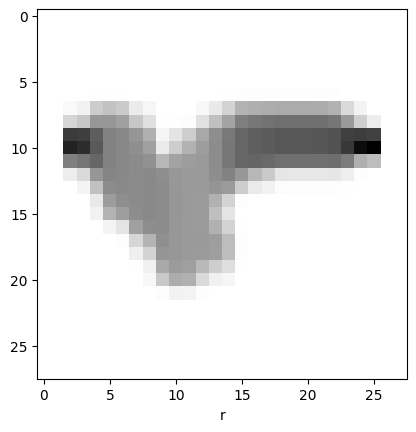

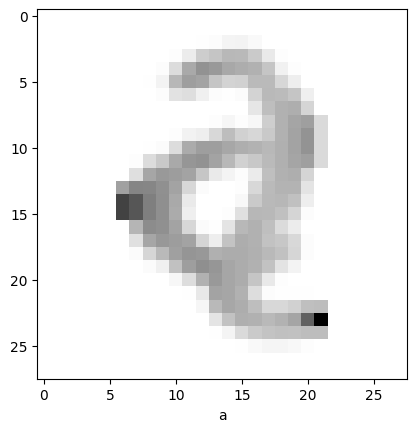

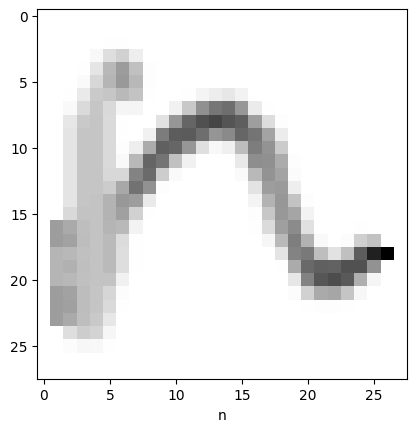

In [20]:
for i in range(0, 3):
    plt.imshow(train_images[i, :, :, 0],cmap = plt.cm.binary)
    plt.xlabel(by_merge_map[train_labels[i]])
    plt.show()

In [23]:
rotation_range_val = 10
width_shift_val = 0.10
height_shift_val = 0.10

train_datagen = ImageDataGenerator(rotation_range = rotation_range_val, width_shift_range = width_shift_val,
                                    height_shift_range = height_shift_val)

train_datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

In [ ]:
val_datagen = ImageDataGenerator()
val_datagen.fit(test_images.reshape(test_images.shape[0], 28, 28, 1))

Model defining

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation = 'softmax'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [41]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [42]:
train_images.shape

(100800, 28, 28, 1)

In [43]:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=512),
         validation_data = (test_images, test_labels), validation_batch_size = 32, epochs= 20)

Epoch 1/20
197/197 [==============================] - 29s 137ms/step - loss: 1.7991 - accuracy: 0.4945 - val_loss: 0.5922 - val_accuracy: 0.8214
Epoch 2/20
197/197 [==============================] - 27s 135ms/step - loss: 0.7290 - accuracy: 0.7739 - val_loss: 0.4292 - val_accuracy: 0.8648
Epoch 3/20
197/197 [==============================] - 28s 143ms/step - loss: 0.5549 - accuracy: 0.8215 - val_loss: 0.3932 - val_accuracy: 0.8727
Epoch 4/20
197/197 [==============================] - 27s 135ms/step - loss: 0.4796 - accuracy: 0.8432 - val_loss: 0.3355 - val_accuracy: 0.8914
Epoch 5/20
197/197 [==============================] - 26s 134ms/step - loss: 0.4314 - accuracy: 0.8575 - val_loss: 0.3199 - val_accuracy: 0.8967
Epoch 6/20
197/197 [==============================] - 26s 134ms/step - loss: 0.3994 - accuracy: 0.8659 - val_loss: 0.2955 - val_accuracy: 0.9013
Epoch 7/20
197/197 [==============================] - 27s 138ms/step - loss: 0.3784 - accuracy: 0.8730 - val_loss: 0.2894 - val_ac

In [44]:
scores = model.evaluate(test_images,test_labels)

525/525 [==============================] - 1s 2ms/step - loss: 0.2407 - accuracy: 0.9151


In [45]:
print(f"Accuracy: {scores[1]*100}%")

Accuracy: 91.51190519332886%


Training and validation accuracy and loss plots

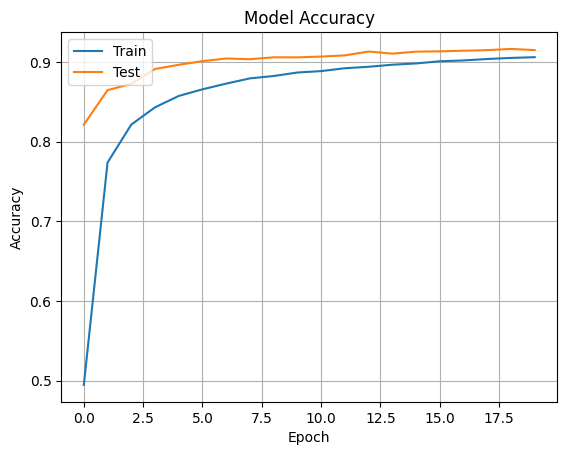

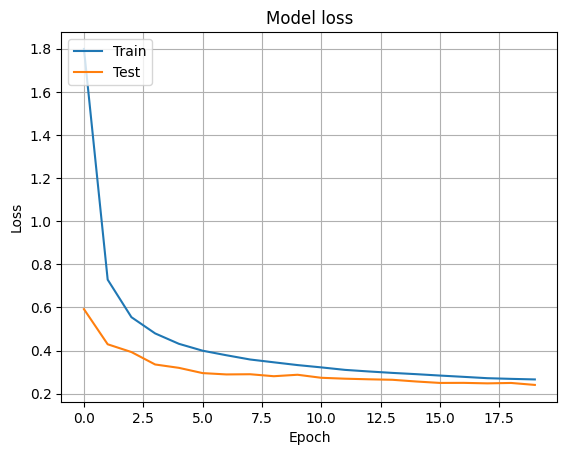

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [38]:
model.save("VIN_model.h5")